In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data_path = "C:\\Users\\hunte\\.vscode\\vs\\Heart Attack Analysis & Prediction Dataset\\heart.csv"

In [5]:
data = pd.read_csv(data_path)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


| 题头      | 医学解释                                                         |
|-----------|------------------------------------------------------------------|
| age       | 年龄，心脏病风险随年龄增长而增加。                               |
| sex       | 性别，通常以1表示男性，0表示女性，心脏病发病率男性通常高于女性。   |
| cp        | 胸痛类型，分为典型心绞痛(1)、非典型心绞痛(2)、无心绞痛(3)。   |
| trtbps    | 治疗后的血压，单位通常为毫米汞柱(mmHg)。                         |
| chol      | 胆固醇水平，单位为毫克/分升(mg/dL)，高胆固醇是心脏病的危险因素。 |
| fbs       | 空腹血糖，1表示有糖耐量受损或糖尿病，0表示无。                 |
| restecg   | 静息心电图结果，1表示异常，0表示正常。                         |
| thalachh  | 最大心率，达到的最大心率数值。                                   |
| exng      | 运动引起的心绞痛，1表示是，0表示否。                             |
| oldpeak   | 运动平板测试中ST段的偏移，单位为mm，反映心肌缺血的情况。         |
| slp       | 心绞痛诱导的ST段压低，1表示存在，0表示不存在。                 |
| caa       | 冠状动脉疾病数量。                                               |
| thall     | 血液检查结果，1表示异常，0表示正常。                             |
| output    | 模型预测结果，1表示心脏病高风险，0表示低风险。                |

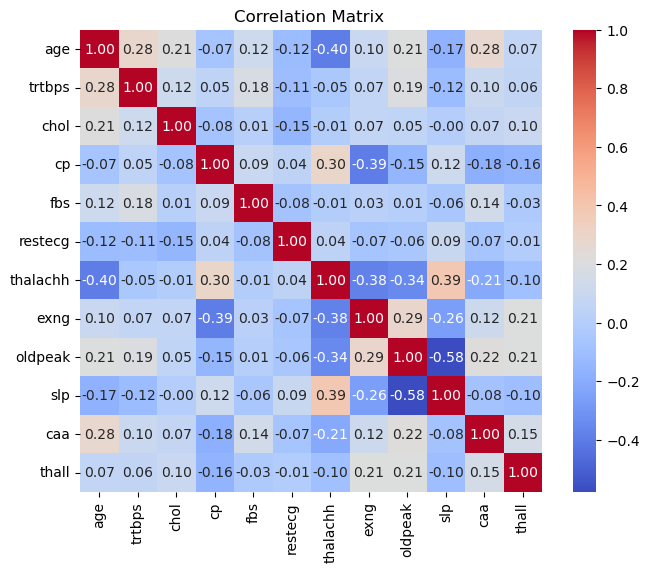

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设CSV数据已经被保存为'heart_data.csv'文件
# 加载数据
df = pd.read_csv(data_path)


columns_to_analyze = ['age', 'trtbps', 'chol','cp','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

# 计算相关性矩阵
correlation_matrix = df[columns_to_analyze].corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix ')
plt.show()